In [1]:
import numpy as np
import scipy.stats
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
N = 10
n = 2900

In [3]:
class Transaction(object):
    
    N = 10
    n = 2900
    
    # Initialize
    def __init__(self, time,tran_id, sender_id, receiver_id, amount, fee):
        self.starttime = time
        self.tran_id = tran_id
        self.sender_id = sender_id
        self.receiver_id = receiver_id
        self.amount = amount
        self.fee = fee
        self.total = fee+amount
        

    def __init__(self,time):
        self.starttime = time
        self.tran_id = 1
        self.sender_id = np.random.randint(0,self.n+1)
        self.receiver_id = np.random.randint(0,self.n+1)
        self.amount = np.random.randint(5,26)
        self.fee = (np.random.randint(1,3)/100)*self.amount
        self.total = self.amount+self.fee
        
    def __lt__(self,other):
        return self.starttime <= other.starttime
    
    # Print a Transaction
    def __repr__(self):
        send = " Transaction of " + str(self.amount) + " BRCs from " + str(self.sender_id) + " to " + str(self.receiver_id) +" with fee " + str(self.fee) 
        return send

In [4]:
import queue
        
class BlockQueue(object):
       
    K = 12
    N = 10
    n = 2900
    MiningRate = 10
    
    # Initialize a Queue
    def __init__(self, MiningRate):
        self.MiningRate = MiningRate
        self.waitingentities = queue.PriorityQueue() #priority
        self.NumberinBlock = []
        self.totalfee = []
        self.totalamount = []
        self.time = []
        self.Numblocks = 0
        self.finished = []
        
    # Print a Queue (just its name and the entire list of waiting Entities)
    def __repr__(self):
        q = " NumWaiting: " + str(self.waitingentities.qsize()) 
        return q
    
    # A new Entity arrives at this Queue
    def ArriveatQueue(self, newtrans):
        self.waitingentities.put((-int(newtrans.fee),newtrans))
    
    # Exit queue and move to service
    def pushBlock(self,t):
        self.time.append(t)
        number = np.minimum(self.waitingentities.qsize(),self.K)
        self.NumberinBlock.append(number)
        winner = np.random.randint(0,self.N)
        feesum = 0
        totsum = 0
        for i in np.arange(0,number):
            entity = self.waitingentities.get(0)[1]
            feesum = feesum + entity.fee
            totsum = totsum + entity.amount
            entity.endtime = t
            self.finished.append(entity)
        self.totalfee.append(feesum)
        self.totalamount.append(totsum)
        accounts[winner] = accounts[winner] + feesum
        self.Numblocks = self.Numblocks + 1

In [5]:
t = 0
t_end = 168
trans_rate = 120
block_rate = 10
accounts = np.zeros(N)
Block = BlockQueue(10)

total_rate = trans_rate + block_rate
nextEventTime = t + np.random.exponential(1/total_rate)

while t < t_end:
    t = nextEventTime
    U = np.random.rand()
    if U <=trans_rate/total_rate:
        event = 0 #transaction arrival
    else:
        event = 1 #block push
        
    if event == 0:
        newArrival = Transaction(t)
        Block.ArriveatQueue(newArrival)
         
    if event == 1:
        Block.pushBlock(t)
        
    nextEventTime = t + np.random.exponential(1/total_rate)


In [6]:
print(accounts)
print(Block.Numblocks)

[441.18 441.04 478.26 453.28 441.85 451.13 472.26 442.17 435.79 456.01]
1761


In [7]:
duration = []
amountt = []
for i in np.arange(0,len(Block.finished)):
    duration.append(Block.finished[i].endtime - Block.finished[i].starttime)
    amountt.append(Block.finished[i].fee)

In [8]:
zipped = zip(duration, amountt)
saved = pd.DataFrame(list(sorted(zipped, key=lambda x: x[1])), columns=['duration', 'amount'])

/Users/irina.wang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


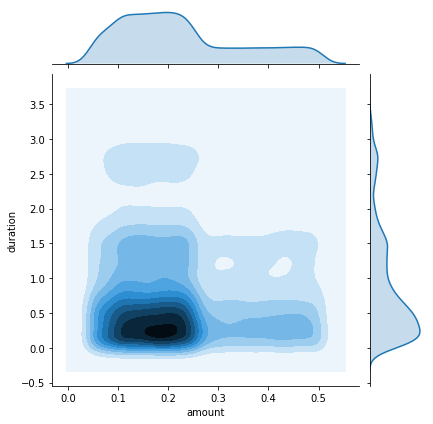

In [9]:
sns.jointplot(x="amount", y="duration", data=saved, kind="kde")
plt.show()

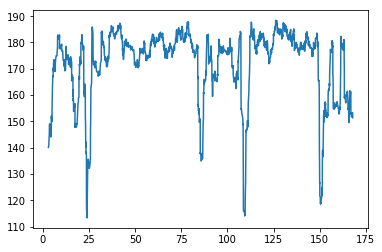

In [10]:
btime = np.array(Block.time)
ave = np.array(btime.shape[0])
ws = 30

ave  = np.cumsum(Block.totalamount)
ave[ws:] = ave[ws:] - ave[:-ws]
ave = ave[ws-1:] / ws

plt.figure()
plt.plot(Block.time[ws-1:], ave)
plt.show()

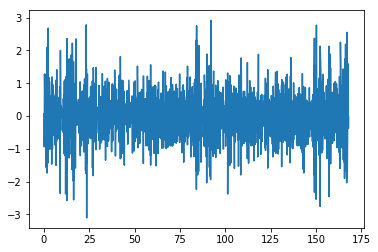

In [11]:
plt.plot(Block.time[1:], np.array(Block.totalfee[1:]) - np.array(Block.totalfee[:-1]))
plt.show()